In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
#warnings.filterwarnings('ignore')

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
#feature visualization
df = pd.read_csv('csv_data/fam_train.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 27 columns):
location              849 non-null object
date                  849 non-null object
zika_bool             849 non-null int64
max_temp              849 non-null float64
max_temp1             849 non-null float64
max_temp2             849 non-null float64
mean_temp             849 non-null float64
mean_temp1            849 non-null float64
mean_temp2            849 non-null float64
min_temp              849 non-null float64
min_temp1             849 non-null float64
min_temp2             849 non-null float64
dew_point             849 non-null float64
dew_point1            849 non-null float64
dew_point2            849 non-null float64
precipitation         849 non-null float64
precipitation1        849 non-null float64
precipitation2        849 non-null float64
wind                  849 non-null float64
wind1                 849 non-null float64
wind2                 849 non-null floa

,zika_bool,max_temp,max_temp1,max_temp2,mean_temp,mean_temp1,mean_temp2,min_temp,min_temp1,min_temp2,...,precipitation2,wind,wind1,wind2,density_per_km,airport_dist_any,airport_dist_large,mosquito_dist,gdp,gdp_ppp
count,849.000000,849.00000,849.000000,849.000000,849.000000,849.000000,849.000000,849.00000,849.000000,849.000000,...,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000
mean,0.828033,54.89258,53.602167,50.971118,48.164064,47.192905,44.455897,41.54490,40.771095,37.934111,...,4.131858,7.357138,8.076890,8.449164,1631.817056,0.343851,9.742860,2.409624,1150.473498,1462.164075
std,0.377574,26.75875,27.132715,25.875634,25.031131,25.545121,24.092395,23.28822,23.849323,22.431187,...,14.479220,4.552783,4.754655,4.989640,3709.898035,3.126678,26.826345,11.982446,3836.174535,3792.571697
min,0.000000,9.00000,3.000000,0.000000,3.000000,0.000000,0.000000,0.00000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.026156,0.000007,0.000007,0.000002,8.700000,18.800000
25%,1.000000,31.00000,31.000000,31.000000,27.000000,27.000000,26.000000,23.00000,23.000000,21.000000,...,0.000000,4.240000,5.000000,5.000000,31.617344,0.012275,0.649641,0.103381,99.300000,184.800000
50%,1.000000,42.05000,35.000000,35.000000,35.100000,30.000000,30.000000,28.15000,26.000000,25.000000,...,0.000000,6.000000,7.000000,7.000000,113.248444,0.090046,3.506601,0.394269,291.500000,666.900000
75%,1.000000,84.00000,85.000000,80.000000,74.000000,74.000000,70.000000,64.45000,64.000000,61.000000,...,1.190000,9.000000,10.000000,10.000000,720.173584,0.251017,9.563564,1.268572,291.500000,666.900000
max,1.000000,99.00000,99.000000,97.000000,90.000000,92.000000,88.000000,82.00000,83.000000,84.000000,...,150.880000,27.000000,33.000000,26.000000,24970.132812,89.839867,495.145246,251.468892,18120.700000,18120.700000


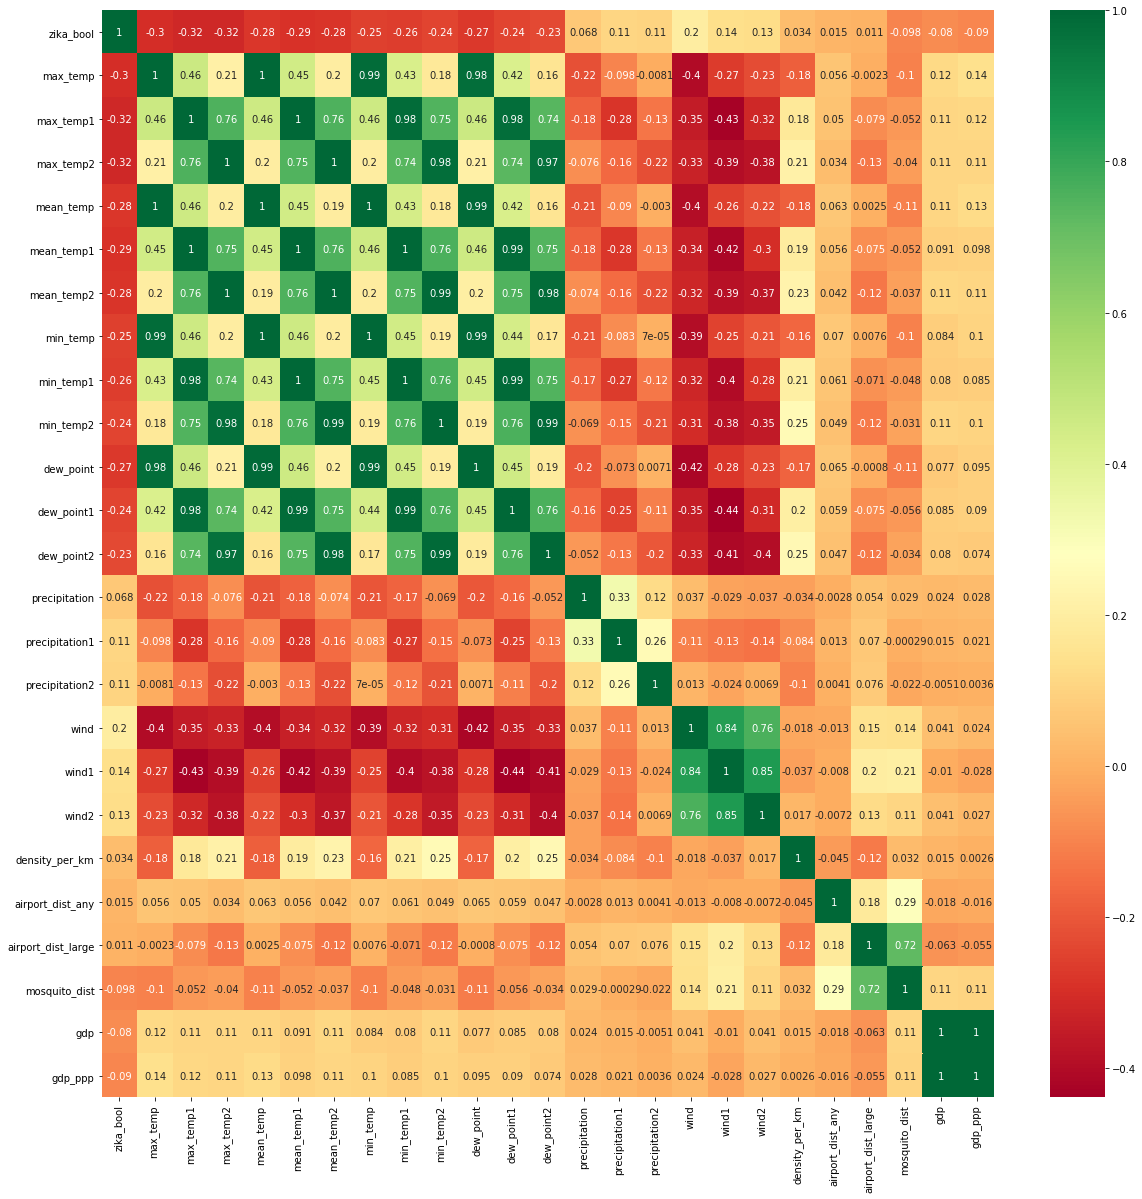

In [7]:
#feature visualization
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

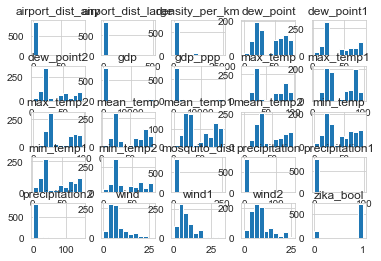

In [7]:
#feature visualization
df.hist()
sns.set_style('whitegrid')

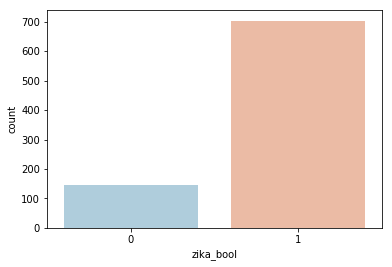

In [8]:
#check data balance
sns.countplot(x='zika_bool',data=df,palette='RdBu_r')

In [9]:
#categorical features
dataset = pd.get_dummies(df, columns = ['location', 'date'])

In [10]:
#scale features with different ranges and units
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['max_temp', 'max_temp1', 'max_temp2','mean_temp', 'mean_temp1', 'mean_temp2', 'min_temp', 'min_temp1','min_temp2', 'dew_point', 'dew_point1', 'dew_point2', 'precipitation','precipitation1', 'precipitation2', 'wind', 'wind1', 'wind2','density_per_km', 'airport_dist_any', 'airport_dist_large','mosquito_dist', 'gdp', 'gdp_ppp']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [11]:
#visualize categorized data and scaled data
dataset.head()

,zika_bool,max_temp,max_temp1,max_temp2,mean_temp,mean_temp1,mean_temp2,min_temp,min_temp1,min_temp2,...,date_2016-05-22,date_2016-05-28,date_2016-06-01,date_2016-06-04,date_2016-06-11,date_2016-06-15,date_2016-06-18,date_2016-06-22,date_2016-06-25,date_2016-06-29
0,1,-0.781236,-0.722881,-0.656259,-0.766060,-0.712607,-0.641904,-0.710860,-0.619716,-0.621560,...,0,0,0,0,0,0,0,0,0,0
1,1,-1.304738,0.494080,0.658493,-1.365667,0.462478,0.645567,-1.398307,0.429150,0.582831,...,0,0,0,1,0,0,0,0,0,0
2,0,0.677090,0.678468,0.813170,0.752944,0.815003,0.936287,0.835898,0.974560,1.028902,...,0,0,0,0,0,0,0,0,0,0
3,1,-0.893415,-0.907269,-0.888274,-0.925956,-0.869285,-0.891092,-0.925687,-0.871444,-0.844595,...,0,0,0,0,0,0,1,0,0,0
4,1,1.125806,1.120999,1.315869,1.072734,1.089190,1.310069,0.964794,1.016515,1.251937,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#create dependent and independent features
y = dataset['zika_bool']
X = dataset.drop(['zika_bool'], axis = 1)

In [13]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

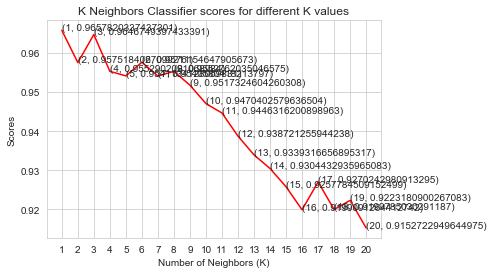

In [14]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [15]:
knn_classifier = KNeighborsClassifier(n_neighbors = 1)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.9657820337437301

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [14]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.9658263305322128